# Convex hull: Giftwrapping / Graham scan

In [38]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#np.random.seed(seed=43)

## generate parameters

In [31]:
def gen_param(num):
    path = np.concatenate([np.arange(num), [0]])
    X = np.random.random(num)
    Y = np.random.random(num)
    XY = X + Y * 1j
    return num, path, X, Y, XY

In [54]:
num, path, X, Y, XY = gen_param(50)

## plot path

In [55]:
def plot_hull(path=False, size=6):
    plt.figure(figsize=(size,size))
    cmap = plt.get_cmap("tab10")
    plt.axis('equal')
    plt.plot(X, Y, alpha=0)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    plt.scatter(X[1:], Y[1:], s=40, c=cmap(0), marker='o')
    if path:
        plt.plot(X[path], Y[path]) 
    for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')

def plot_path(path, size=6):
    plt.figure(figsize=(size, size))
    cmap = plt.get_cmap("tab10")
    plt.axis('equal')
    plt.plot(X[path], Y[path], alpha=0)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    for i in range(len(path)-1):
        plt.arrow(X[path[i]], Y[path[i]], 
                  X[path[i+1]]-X[path[i]], Y[path[i+1]]-Y[path[i]], 
                  head_width=0.02, head_length=0.02, length_includes_head=True,
                  fc=cmap(0), ec=cmap(0))    
    for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')

51

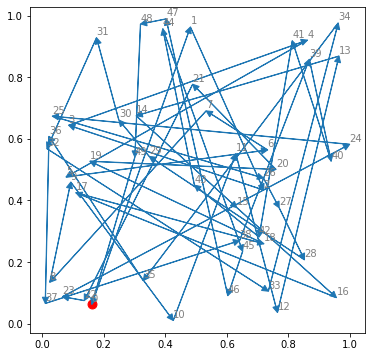

In [56]:
plot_path(path)
len(path)

## Giftwrapping:

In [58]:
def giftwrap():
    lowest_y = np.where(Y==min(Y))[0][0]
    plist = [lowest_y]
    prev_theta = np.inf
    
    for a in range(num): 
        best_theta = -np.inf
        best_idx = None
        for i in range(num):
            if i not in  plist:
                theta = np.arctan2(Y[i]-Y[plist[-1]], X[i]-X[plist[-1]])
                if theta >= best_theta and theta <= prev_theta:
                    best_idx = i
                    best_theta = theta
                    
        if best_idx is not None:
            theta_to_start = np.arctan2(Y[plist[0]]-Y[best_idx], X[plist[0]]-X[best_idx])
            if best_theta >= theta_to_start:
                plist.append(best_idx)
                prev_theta = best_theta
            #else:
            #    break
        else:
            print(a)
            break

    plist.append(plist[0])
    
    return plist

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


10
0.001994609832763672


[10, 37, 32, 25, 31, 48, 47, 34, 24, 16, 12, 10]

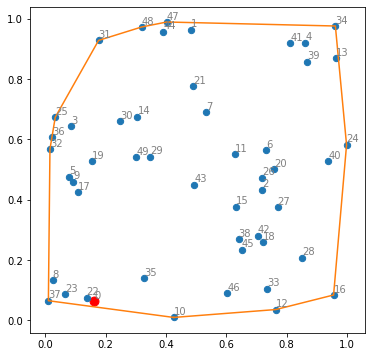

In [59]:
# NUM, X, Y = gen_param(20)
startTime = time.time()
hull = giftwrap()
print(time.time()-startTime)
plot_hull(hull)
hull

## Graham Scan:

In [60]:
def graham_scan():
    lowest_y = np.where(Y==min(Y))[0][0]
    plist = [lowest_y]
    
    theta_list = [] 
    for i in range(num):
        theta = np.arctan2(Y[i]-Y[plist[-1]], X[i]-X[plist[-1]])
        theta_list.append(theta)
        
    sorted_index = np.argsort(theta_list)
    
    for i in range(1,num):
        plist.append(sorted_index[i])
        if i > 1:
            v1 = [X[plist[-2]] - X[plist[-3]], Y[plist[-2]] - Y[plist[-3]]]
            v2 = [X[plist[-1]] - X[plist[-2]], Y[plist[-1]] - Y[plist[-2]]]
            while np.cross(v1, v2) < 0:
                plist.pop(-2)
                v1 = [X[plist[-2]] - X[plist[-3]], Y[plist[-2]] - Y[plist[-3]]]
                v2 = [X[plist[-1]] - X[plist[-2]], Y[plist[-1]] - Y[plist[-2]]]
        
    plist.append(plist[0])
    return plist

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.001994609832763672


[10, 12, 16, 24, 34, 47, 48, 31, 25, 32, 37, 10]

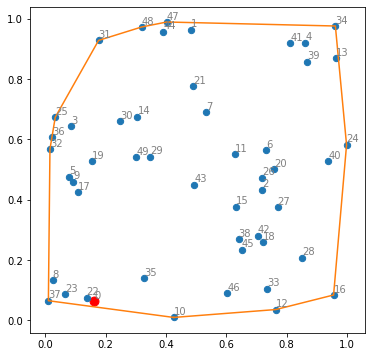

In [61]:
# NUM, X, Y = gen_param(100)
startTime = time.time()
hull = graham_scan()
print(time.time()-startTime)
plot_hull(hull)
hull

## Construct Tour by Insertion Method

In [10]:
def hull_insert(path, hull):
    Path = list(path[:-1].copy())
    Hull = list(hull[:-1].copy())
    for h in Hull:
        Path.remove(h)
        
    def tri_length(p0, p1, pt): 
        d0t = abs(XY[p0]-XY[pt])
        d1t = abs(XY[p1]-XY[pt])
        d01 = abs(XY[p0]-XY[p1])
        L = d0t + d1t - d01
        return L
       
    while len(Path):
        best_len = np.inf
        best_node = None
        for i in range(len(Hull)):
            for p in Path:
                if i == len(Hull)-1:
                    L = tri_length(Hull[i], Hull[0], p)
                else:
                    L = tri_length(Hull[i], Hull[i+1], p)
                if L < best_len:
                    best_len = L
                    best_node = [Hull[i], p]
                        
        Hull.insert(Hull.index(best_node[0])+1, best_node[1])
        Path.remove(best_node[1])

    zero = Hull.index(0)
    tour = Hull[zero:] + Hull[:zero] + [0]
    return tour

51

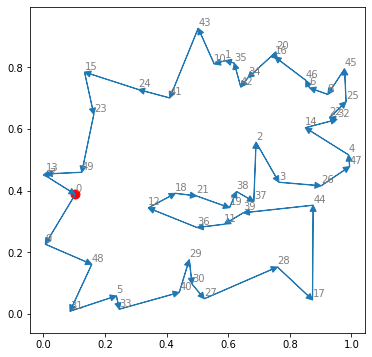

In [11]:
path = hull_insert(path, hull)
plot_path(path, 6)
len(path)

## Construction Animation

In [12]:
import matplotlib.animation as animation
from IPython.display import HTML

def anim_hull_insert(path, hull):
    Path = list(path[:-1].copy())
    Hull = list(hull[:-1].copy())
    for h in Hull:
        Path.remove(h)
        
    def tri_length(p0, p1, pt): 
        d0t = abs(XY[p0]-XY[pt])
        d1t = abs(XY[p1]-XY[pt])
        d01 = abs(XY[p0]-XY[p1])
        L = d0t + d1t - d01
        return L
    
    fig = plt.figure(figsize=(8,8))
    cmap = plt.get_cmap("tab10")
    plt.axis('equal')
    ims = []
    
    while len(Path):
        best_len = np.inf
        best_node = None
        for i in range(len(Hull)):
            for p in Path:
                if i == len(Hull)-1:
                    L = tri_length(Hull[i], Hull[0], p)
                else:
                    L = tri_length(Hull[i], Hull[i+1], p)
                if L < best_len:
                    best_len = L
                    best_node = [Hull[i], p]
                        
        Hull.insert(Hull.index(best_node[0])+1, best_node[1])
        Path.remove(best_node[1])

        P0 = plt.plot(X, Y, alpha=0.0)
        P1 = plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
        P2 = plt.scatter(X[1:], Y[1:], s=40, c=cmap(0), marker='o')
        P3 = plt.plot(X[Hull+[Hull[0]]], Y[Hull+[Hull[0]]], c='orange')
        P4 = []
        for i in range(num):
            P4.append(plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray'))
        ims.append(P0 + [P1] + [P2] + P3 + P4)
        
    ani = animation.ArtistAnimation(fig,ims,interval=200)
    #ani.save("hull_anim.gif", writer = "imagemagick")
    plt.close()
    print('Total frame:', len(ims))
    return ani


In [13]:
ani = anim_hull_insert(path, hull)
HTML(ani.to_jshtml())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Total frame: 41
